<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-FernandoSzkvarak/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Aula01_Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os pixels

## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


In [1]:
# Bloco 1: Configuração inicial e obtenção da imagem
# ===================================================

# Módulos numéricos e de visualização
import numpy as processamento_numerico
from PIL import Image as ManipuladorImagens
import matplotlib.pyplot as interface_grafica
import requests

# Parâmetros de exibição
interface_grafica.style.use('ggplot')
%config InlineBackend.figure_format = 'jpeg'

# Obter recurso visual
origem_imagem = "https://images.unsplash.com/photo-1745810187217-4d9e1ccfd9d5?ixlib=rb-4.1.0&q=85&fm=jpg&crop=entropy&cs=srgb&w=640"
dados_brutos = requests.get(origem_imagem, stream=True).raw
img_original = ManipuladorImagens.open(dados_brutos).convert("RGB")

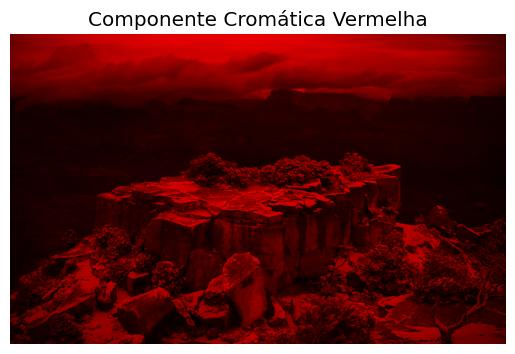

In [2]:
# Bloco 2: Exibição do canal vermelho puro
# ========================================

matriz_rgb = processamento_numerico.array(img_original)
canal_vermelho = matriz_rgb.copy()
canal_vermelho[:, :, (1,2)] = 0  # Anula verde e azul

interface_grafica.imshow(canal_vermelho)
interface_grafica.title('Componente Cromática Vermelha')
interface_grafica.axis(False)
interface_grafica.show()

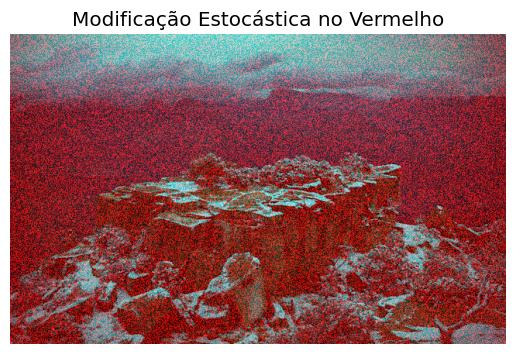

In [3]:
# Bloco 3: Distorção aleatória no canal R
# ========================================

# Gerar ruído para canal vermelho
distorcao_r = processamento_numerico.random.randint(
    low=0,
    high=256,
    size=(matriz_rgb.shape[0], matriz_rgb.shape[1]),
    dtype='uint8'
)

img_alterada = matriz_rgb.copy()
img_alterada[:, :, 0] = distorcao_r  # Substitui canal R

interface_grafica.imshow(img_alterada)
interface_grafica.title('Modificação Estocástica no Vermelho')
interface_grafica.axis('off')
interface_grafica.show()

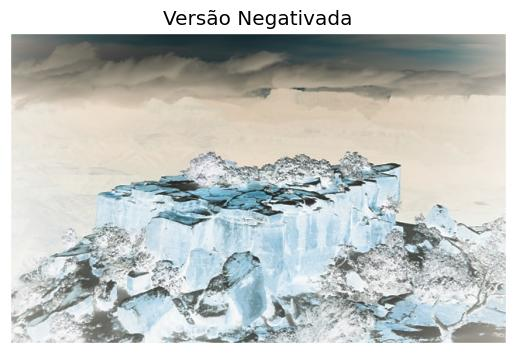

In [9]:
# Bloco 4: Inversão tonal completa (VERSÃO CORRIGIDA)
# ================================

imagem_invertida = 255 - matriz_rgb  # Operação vetorizada

interface_grafica.imshow(imagem_invertida)
interface_grafica.title('Versão Negativada')
interface_grafica.xticks([])
interface_grafica.yticks([])
interface_grafica.show()  # Corrigido para show() ao invés de display()

In [10]:
# Bloco 5: Armazenamento do negativo
# ===================================

ManipuladorImagens.fromarray(imagem_invertida).save('inverso.jpg')
print("Arquivo 'inverso.jpg' gerado com sucesso")

Arquivo 'inverso.jpg' gerado com sucesso


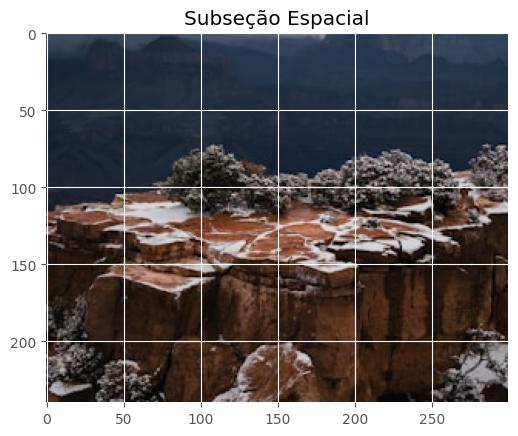

In [11]:
# Bloco 6: Extração de região específica
# =======================================

# Coordenadas: (esquerda, topo, direita, base)
limites = (150, 80, 450, 320)
pedaco = img_original.crop(limites)

pedaco.save('segmento.jpg')
interface_grafica.imshow(pedaco)
interface_grafica.title('Subseção Espacial')
interface_grafica.box(False)
interface_grafica.show()